# Milestone 3: Investigate Project Questions

<hr style="clear:both">

Use this notebook for a quick start to the project. When a question is finished, extract it to multiple function callable from the website

**Project Mentor:** [Aoxiang Fan](https://people.epfl.ch/aoxiang.fan) ([Email](mailto:aoxiang.fan@epfl.ch))
**Authors:** [Luca Carroz](https://people.epfl.ch/emilie.carroz), [David Schroeter](https://people.epfl.ch/david.schroeter), [Xavier Ogay](https://people.epfl.ch/xavier.ogay), [Joris Monnet](https://people.epfl.ch/joris.monnet), [Paulo Ribeiro de Carvalho](https://people.epfl.ch/paulo.ribeirodecarvalho)

<hr style="clear:both">

## Import

In [39]:
# Import needed libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr


# Load autoreload extension
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DataSet
Check that all data sets are already computed, if not please read `README.md` and follow steps for its creation.

In [77]:
folder_path = 'dataset/'
file_names = ['clean_enrich_movies.csv', 'spotify_composers_dataset.csv', 'mapping_locations_to_country.csv']
file_paths = [folder_path + file_name for file_name in file_names]
file_exist = [os.path.exists(file_path) for file_path in file_paths]

if all(file_exist):
    print(f"All files exist and are in the correct directory.")
else:
    print(
        f"At least one file doesn't exist. Please be sure to have the files and to locate them in the right directory (dataset/).")

All files exist and are in the correct directory.


## Load Data

Section to load the enriched and retrieved data.

In [78]:
spotify_composers_dataset = pd.read_pickle('dataset/spotify_composers_dataset.pickle')
clean_enrich_movies = pd.read_pickle('dataset/clean_enrich_movies.pickle')
location_to_country = pd.read_csv('dataset/mapping_locations_to_country.csv')

# display(clean_enrich_movies)

## Question 1

Which are the most frequent music genre appearing in movies ?

In [79]:
from question_script.question1 import *

# Retrieve composer name out of the composer class to easily join spotify and movie dataframes
composers_to_movies = create_db_to_link_composers_to_movies(clean_enrich_movies)

In [80]:
# TODO: Discuss about a possible interactive graph. The user can choose the range of box office revenue of movies and see the ranking with genre. GOAL: See if low, middle or high box office revenue have same ranking in music genre or not.

# Join spotify and movie dataset and choose the relevant attributes for question 1
movie_music_genre_df = pd.merge(left=spotify_composers_dataset,
                                right=composers_to_movies,
                                left_on='name',
                                right_on='composer_name',
                                how='inner')[['movie_name', 'genres', 'movie_revenue']]

question_1(movie_music_genre_df=movie_music_genre_df,
           min_revenue=0,
           max_revenue=int(1e12),
           soundtrack_in_genre=False)

,genre,count
16,filmi,119
207,scorecore,112
17,modern bollywood,107
209,movie tunes,97
92,singer-songwriter,95
...,...,...
48,ye ye,1
358,irish classical,1
357,celtic harp,1
356,women's music,1


## Question 2

What is the average composer's age at their :
   - first movie appearance ?
   - biggest box office revenue ?

### Average composer's age at their first movie appearance

In [81]:
from question_script.question2 import *

composer_dataframe_with_fst_appearance = calculate_composer_age_fst_appearance(clean_enrich_movies)

composer_fst_appearance_days, composer_fst_appearance_years = get_average_age_first_appearance(composer_dataframe_with_fst_appearance)

print("The average age of the composer at his first movie is:\n"
      f"\t- {composer_fst_appearance_years:.3f} years\n"
      f"\t- {composer_fst_appearance_days:.3f} days")

The average age of the composer at his first movie is:
	- 34.198 years
	- 12490.663 days


C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



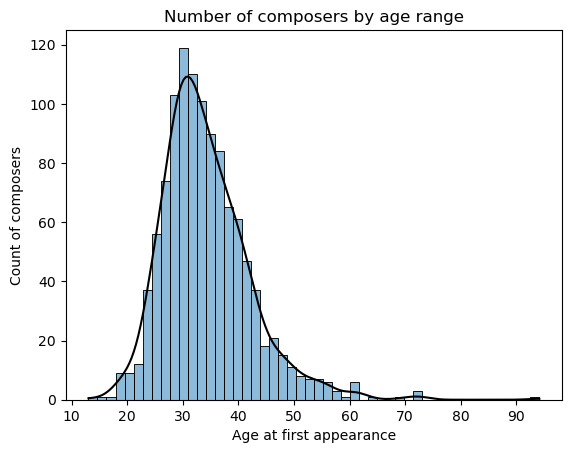

In [82]:
plot_composer_by_age_range(composer_dataframe_with_fst_appearance, 'c_age_first_appearance_years', bin_nb=50)

### Average composer's age at their biggest box office revenue

In [83]:
composer_age_highest_box_office = calculate_composer_age_highest_box_office(clean_enrich_movies)

composer_age_high_box_office_days, composer_age_high_box_office_years = get_average_age_high_box_office(composer_age_highest_box_office)

print("The average age of the composer at his highest box office revenue is:\n"
      f"\t- {composer_age_high_box_office_years:.3f} years\n"
      f"\t- {composer_age_high_box_office_days:.3f} days")

The average age of the composer at his highest box office revenue is:
	- 41.891 years
	- 15300.559 days


C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



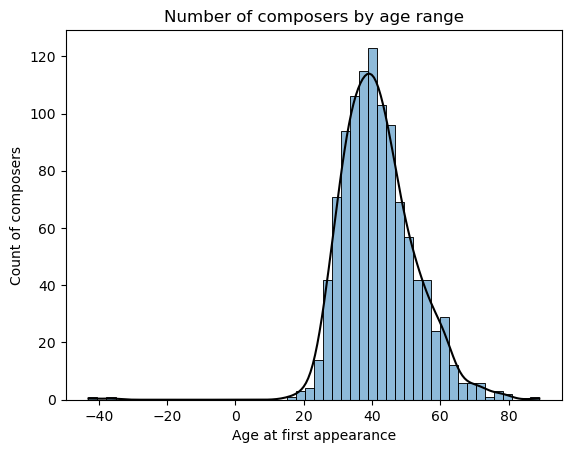

In [84]:
plot_composer_by_age_range(composer_age_highest_box_office, 'c_age_highest_revenue_years', bin_nb=50)

## Question 3

How the top composers' career progress over the years ?

In [85]:
from question_script.question3 import *

movie_renamed = prepare_data_for_q3()

display(movie_renamed.head())
print(movie_renamed.shape)

,release_date,composers,box_office_revenue
0,2009,"[Composer(id=1729, name='James Horner', birthd...",2.782275e+09
1,1997,"[Composer(id=1729, name='James Horner', birthd...",2.185372e+09
2,2012,"[Composer(id=37, name='Alan Silvestri', birthd...",1.511758e+09
3,2011,"[Composer(id=2949, name='Alexandre Desplat', b...",1.328111e+09
4,2013,"[Composer(id=6041, name='Brian Tyler', birthda...",1.215577e+09


(7424, 3)


,release_year,composer,box_office_revenue
0,2009,"Composer(id=1729, name='James Horner', birthda...",2.782275e+09
1,1997,"Composer(id=1729, name='James Horner', birthda...",2.185372e+09
2,2012,"Composer(id=37, name='Alan Silvestri', birthda...",1.511758e+09
3,2011,"Composer(id=2949, name='Alexandre Desplat', bi...",1.328111e+09
4,2013,"Composer(id=6041, name='Brian Tyler', birthday...",1.215577e+09


(8505, 3)


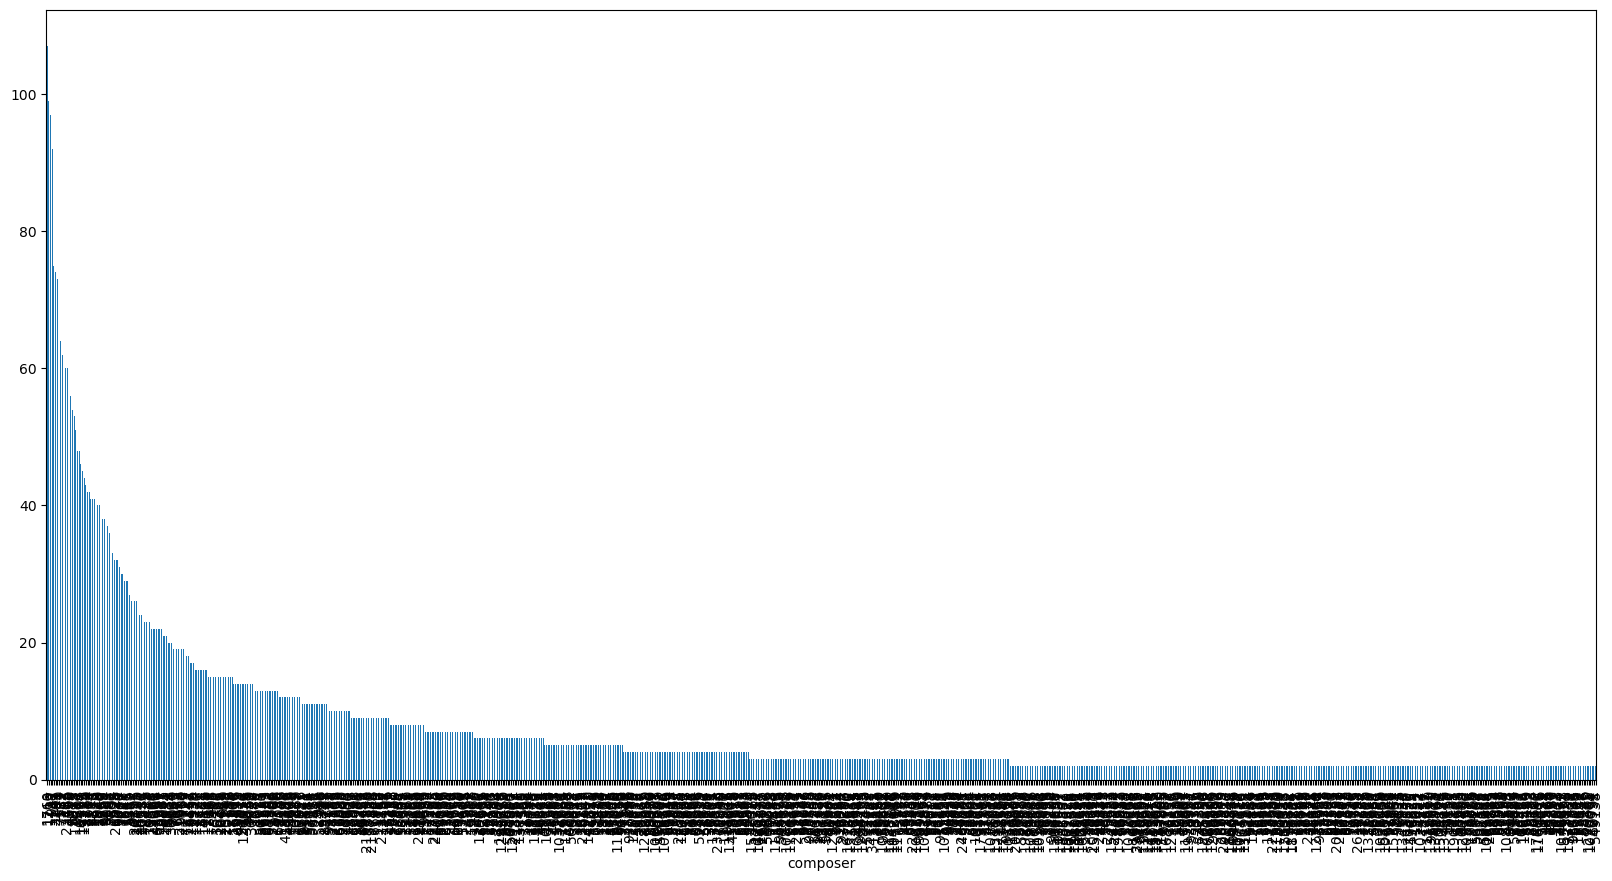

In [86]:
movie_grouped_by_composer = group_by_composer_id(movie_renamed)

# Don't show the composer with only one movie
movie_grouped_by_composer = movie_grouped_by_composer.filter(lambda x: len(x) > 1)

# Plot the number of movies per composer
movie_grouped_by_composer['composer'].value_counts().plot(kind='bar', figsize=(20, 10))
plt.show()

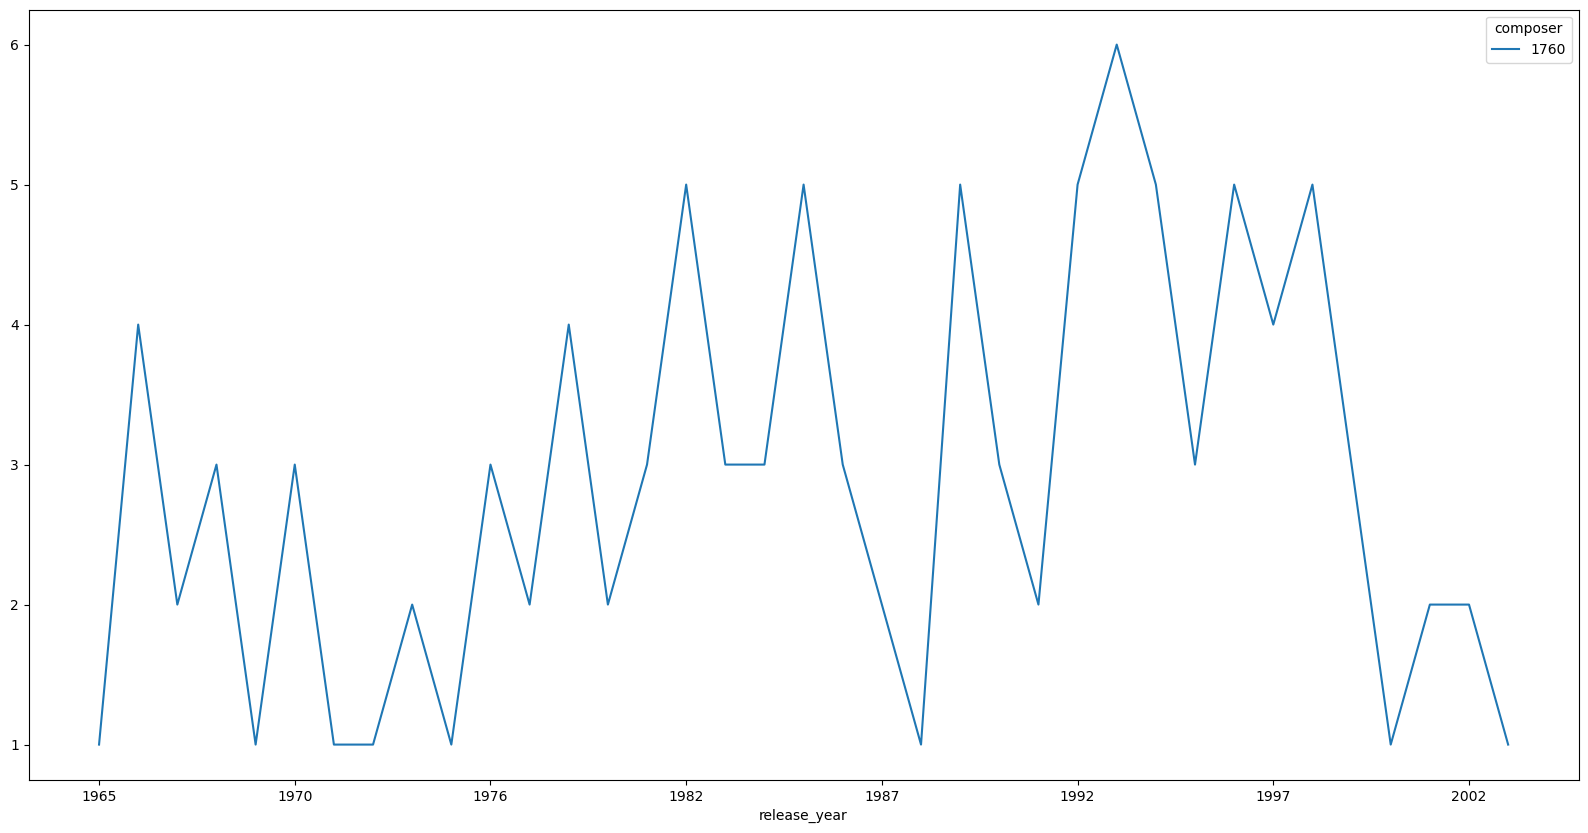

In [87]:
movie_grouped_by_top_composer = filter_by_top_composers(movie_grouped_by_composer, 1)

# Plot the evolution of the number of movies per year for the top 25 composers
movie_grouped_by_composer_and_year = movie_grouped_by_top_composer.groupby(['composer', 'release_year'])
movie_grouped_by_composer_and_year['composer'].value_counts().unstack(0).plot(figsize=(20, 10))
plt.show()

<Axes: xlabel='release_year'>

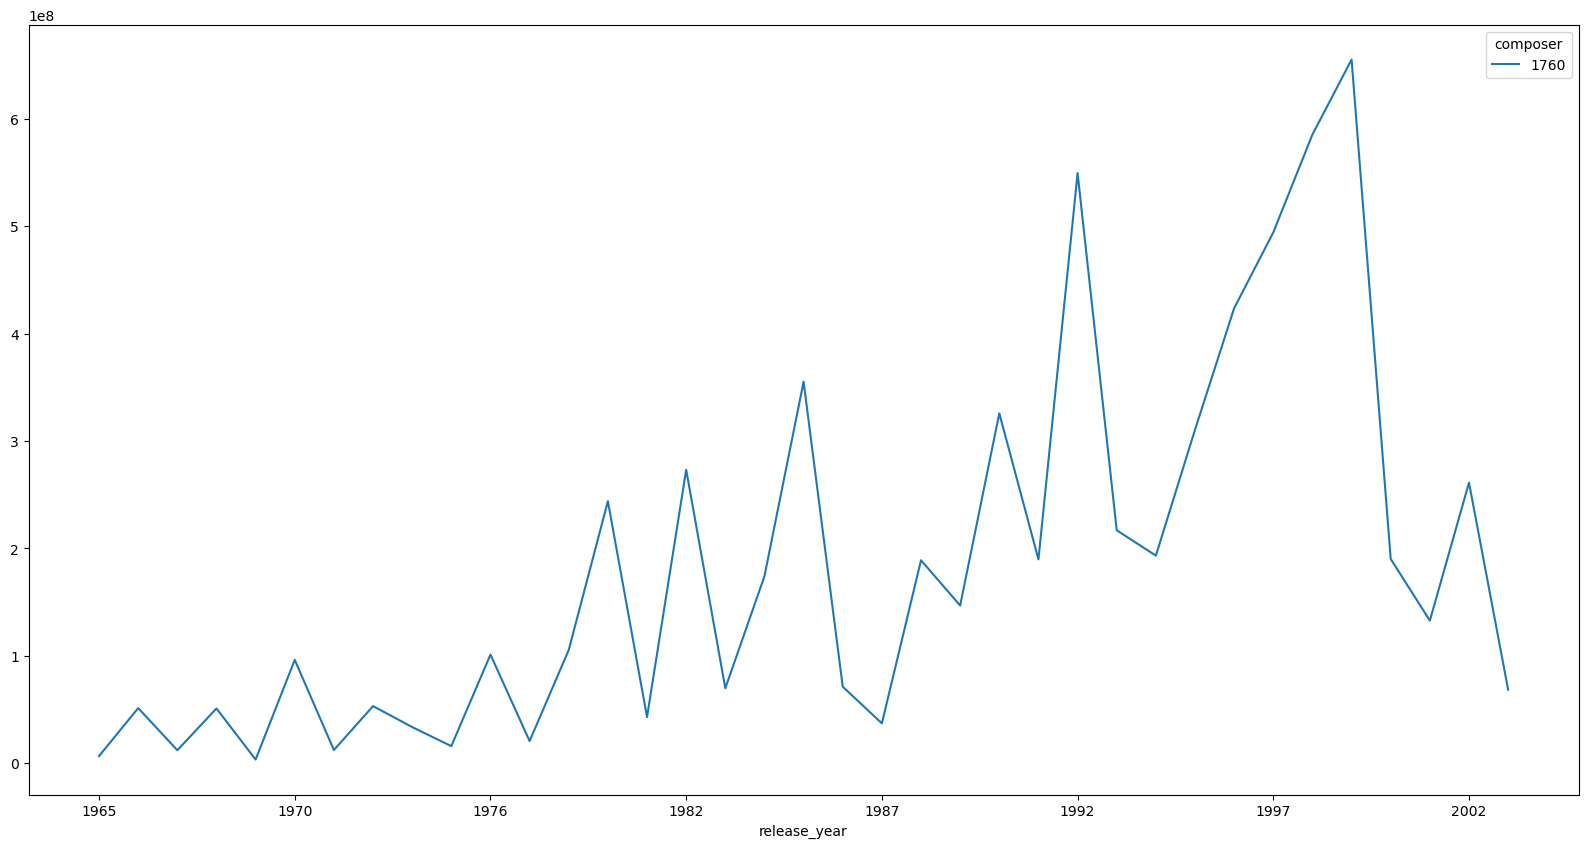

In [88]:
# Plot the evolution of the revenue for the film per year for the top composers
movie_grouped_by_composer_and_year['box_office_revenue'].sum().unstack(0).plot(figsize=(20, 10))

## Question 4

Where do composers come from ?

In [89]:
from question_script.question4 import *

# Use the already computed dataframe from q.1 to retrieve information like the place_of_birth of all composers
composer_place_of_birth_df = pd.merge(
    left=spotify_composers_dataset,
    right=composers_to_movies,
    left_on='name',
    right_on='composer_name',
    how='inner'
)[['composer_name', 'composer_place_of_birth', 'popularity']].drop_duplicates()  # note: few rows were duplicate

# Delete rows (composers) where we do not have the place of birth (i.e. None value)
composer_place_of_birth_df = composer_place_of_birth_df.query('composer_place_of_birth.notna()')

# Compute the number of composer per location within the selected range of composer's popularity
number_composer_per_location = composers_selection_over_popularity(
    df=composer_place_of_birth_df,
    min_popularity=0,
    max_popularity=100
).groupby('composer_place_of_birth').count()["composer_name"]

# For plot reasons, map all locations to its corresponding country and count again the number of composer
number_composer_per_country = pd.merge(
    left=number_composer_per_location,
    right=location_to_country,
    left_on='composer_place_of_birth',
    right_on='location',
    how='outer'
).groupby('country').count()["location"]

[link](https://plotly.com/python/builtin-colorscales/) to see different colors.

In [90]:
heat_map_world(df=number_composer_per_country.reset_index(),
               color='peach')

## Question 5

Does composer's gender matter ?

In [9]:
#TODO: uncomment and delete plotly code 
#from question_script.question5 import *
#
## Get all movie composers
#composers = get_cleaned_composers()
#
## Count the occurrences of each gender
#gender_counts = composers['gender'].value_counts()
#
## Create a bar chart
#fig, ax = plt.subplots()
#bars = ax.bar(gender_counts.index, gender_counts)
#
## Set plot title and labels
#ax.set_title("Number of Male vs Female movie composers from 1915 to 2014")
#ax.set_xlabel("Gender")
#ax.set_ylabel("Count")
#
## Add hover information as text labels above the bars
#for bar in bars:
#    yval = bar.get_height()
#    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'Count: {yval}', ha='center', va='bottom')
#
## Show the plot
#plt.show()
# TODO: this plot is not very interesting for the website, only add the one with the years (below)
from question_script.question5 import *

# Get all movie composers
composers = get_cleaned_composers()

# Count the occurrences of each gender
gender_counts = composers['gender'].value_counts()

# Create a bar chart with hover information
fig = px.bar(x=gender_counts.index, y=gender_counts,
             title="Number of Male vs Female movie composers from 1915 to 2014",
             labels={'y': 'Count', 'x': 'Gender'})

# Add hover information
fig.update_traces(hovertemplate='Count: %{y}')

# Show the plot
fig.show()

Let's see how this ratio evolved over the years

In [115]:
## Dataframe containing the number of composers for each year, grouped by their gender
#gender_prop_by_year = pd.crosstab(index=composers['release_date'], columns=composers['gender'], normalize='index')
## Plot the dataframe
#gender_prop_by_year.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(20, 10))
#plt.xticks(np.arange(-2, 96, 10))
#plt.title('Proportion of Female vs Male composers across years')
#plt.legend(loc="upper left", ncol=2)
#plt.xlabel("Year")
#plt.ylabel("Proportion")
#plt.show()

# Get all movie composers
composers = get_cleaned_composers()

# Dataframe containing the number of composers for each year, grouped by their gender
gender_prop_by_year = pd.crosstab(index=composers['release_date'], columns=composers['gender'], normalize='index')

# Reshape the dataframe to long format
gender_prop_by_year = gender_prop_by_year.reset_index().melt(id_vars=['release_date'], var_name='gender', value_name='proportion')

# Create a bar chart with hover information
fig = px.bar(gender_prop_by_year,
             x='release_date',
             y='proportion',
             color='gender',
             title='Distribution of female vs male composers across years',
             labels={'proportion': 'Percentage', 'gender': 'Gender', 'release_date': 'Year'},
             hover_data={'proportion': ':.1%'},
             log_y=True,
             color_discrete_map={'Female': 'rgba(180, 151, 231, 0.8)', 'Male': 'rgba(136, 136, 136, 0.2)'},
             width=800, 
             height=400)

# Change x axis ticks to be more readable
fig.update_layout(xaxis=dict(tickmode='linear', tick0=-2, dtick=10), 
                  yaxis=dict(tickformat=',.0%'), 
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)')
fig.write_html("question_script/question5.html")
# Show the plot
fig.show()

## Question 6

Does having a personal website correlate with the composers' success ?

In [116]:
from question_script.question6 import *

#composers_success_website = get_composer_success_and_website()
#composers_success_website.boxplot(column='popularity', by='has_homepage', figsize=(20, 10))

composers_success_website = get_composer_success_and_website()
fig = px.box(composers_success_website, 
       x="website", 
       y="total_box_office", 
       log_y=True,
       notched = True,
       labels={'website': '', 'total_box_office': 'Total box office revenue'}, 
       points="all",
       hover_data={'website': False},
       boxmode ="overlay",
       title="Popularity of composers with and without a personal website")
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)')
fig.write_html("question_script/question6.html")
fig.show()

In [77]:
# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(composers_success_website['total_box_office'], composers_success_website['has_website'])

# Print the results
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant correlation.")
    if correlation_coefficient > 0:
        print("The correlation is positive.")
    elif correlation_coefficient < 0:
        print("The correlation is negative.")
    else:
        print("There is no linear correlation, but there may be a non-linear relationship.")
else:
    print("There is no significant correlation.")

Pearson correlation coefficient: 0.11253512834674324
P-value: 2.3663783597549656e-08
There is a significant correlation.
The correlation is positive.


## Question 7

Is there a correlation between box office revenue and movie's playlist popularity ?

In [116]:
import question_script.question7 as q7

merged_df, pop_df = q7.get_merged_and_pop_df()

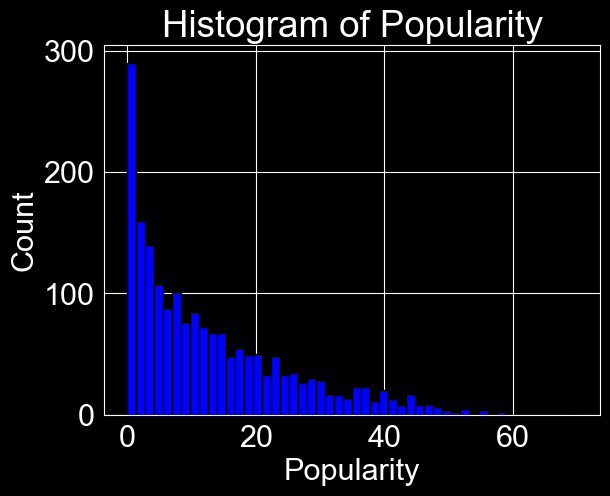

In [117]:
q7.plot_popularity_histogram(pop_df)
q7.plot_popularity_histogram_matplt(pop_df)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

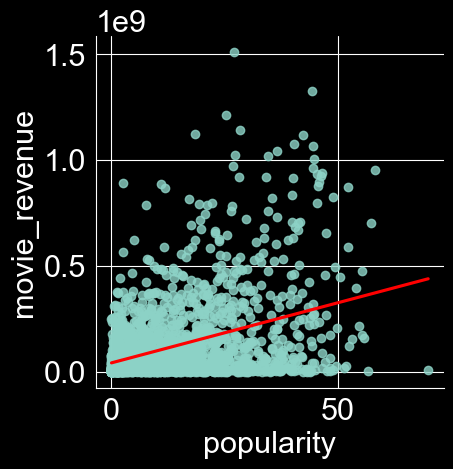

In [118]:
q7.plot_scatter_popularity_revenue_overall(merged_df)
q7.plot_scatter_popularity_revenue_overall_matplotlib(merged_df)

In [119]:
q7.print_pearson_correlation(merged_df)

Pearsons correlation: 0.392


C:\Users\xagao\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning:

divide by zero encountered in scalar divide



C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\xagao\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



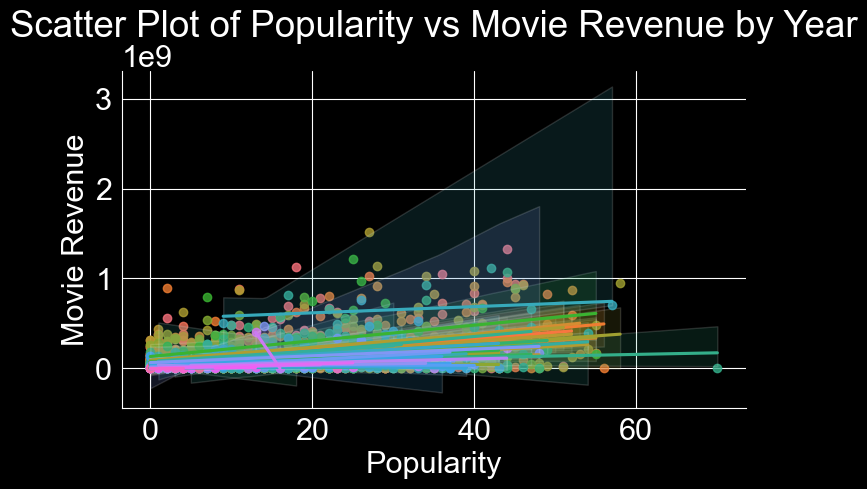

In [120]:
q7.plot_scatter_popularity_revenue_by_year(merged_df)
q7.plot_scatter_popularity_revenue_by_year_matplotlib(merged_df)

,year,correlation,mean_revenue
15,1959,0.477916,7319548.25
17,1961,0.205819,11712760.0
18,1962,-0.192297,7826090.75
19,1963,0.298659,10282764.666667
21,1965,0.520476,26147356.6
22,1966,-0.076513,14114152.0
23,1967,0.777949,27757609.909091
24,1968,0.792902,20364054.8
26,1970,0.680985,39887726.8
27,1971,-0.470170,29420784.333333


C:\Users\xagao\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



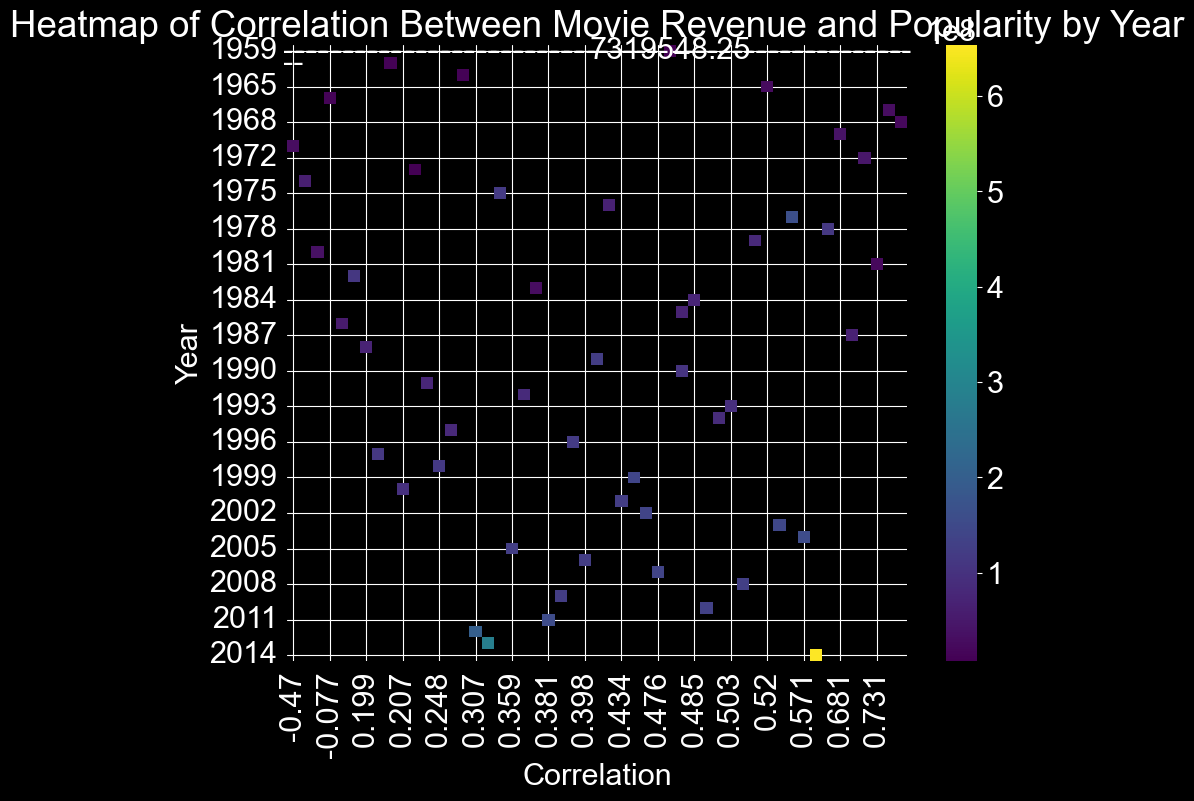

In [133]:
q7.plot_heatmap_correlation(merged_df)
q7.plot_heatmap_correlation_matplotlib(merged_df)